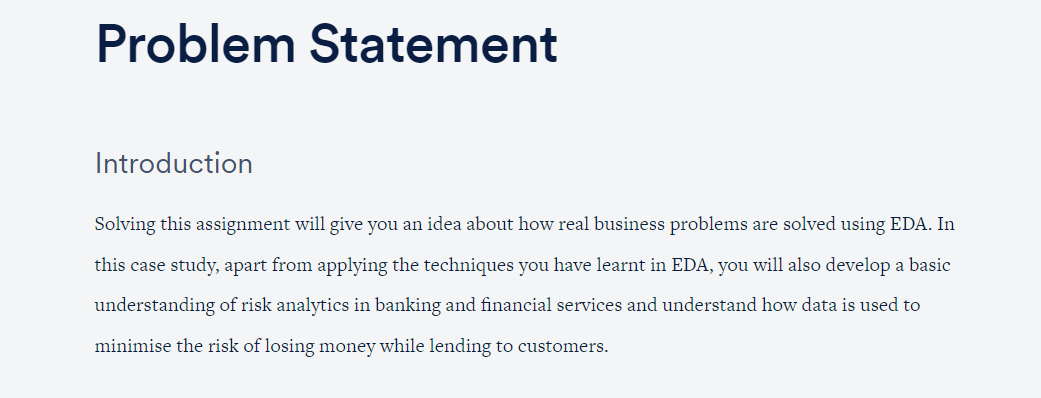
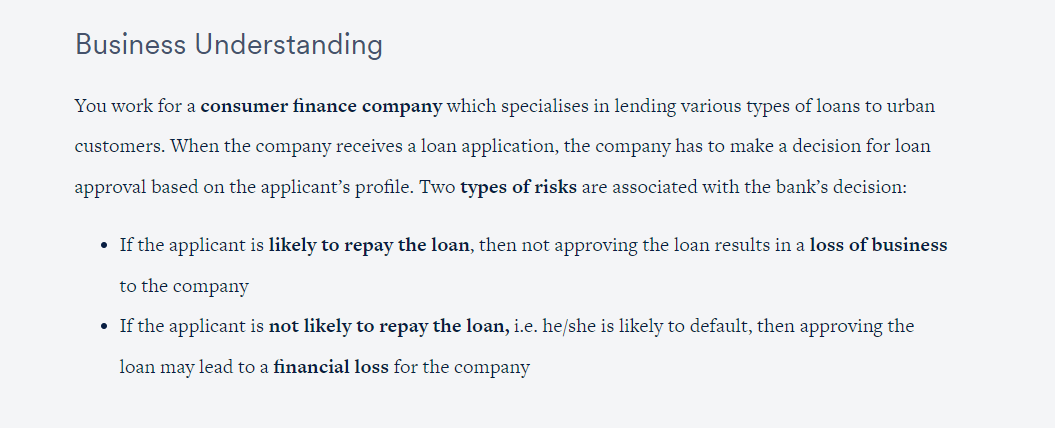
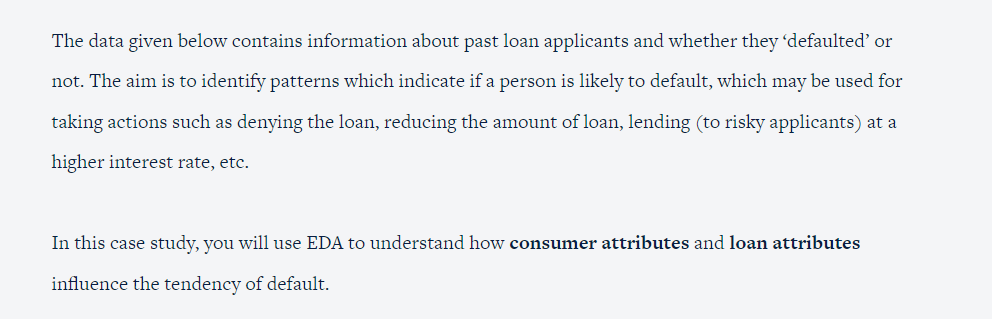
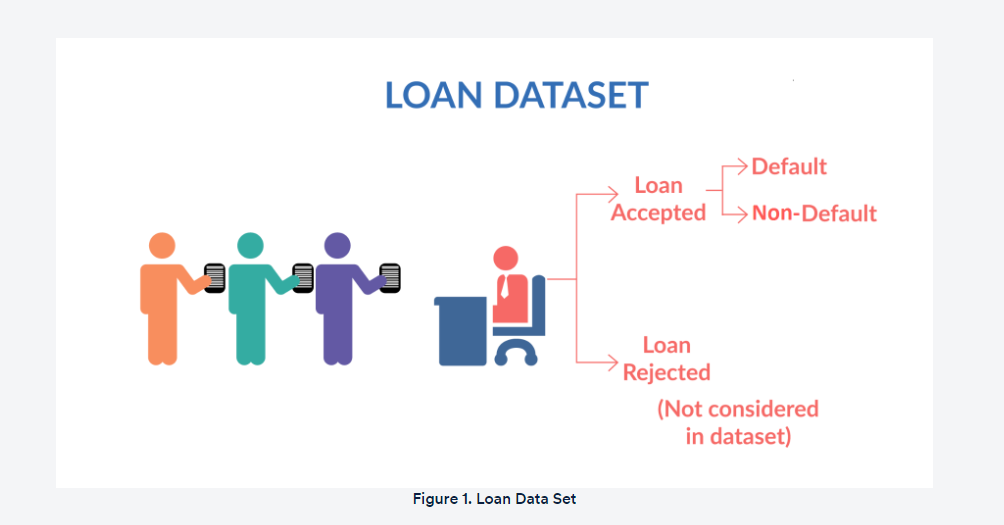
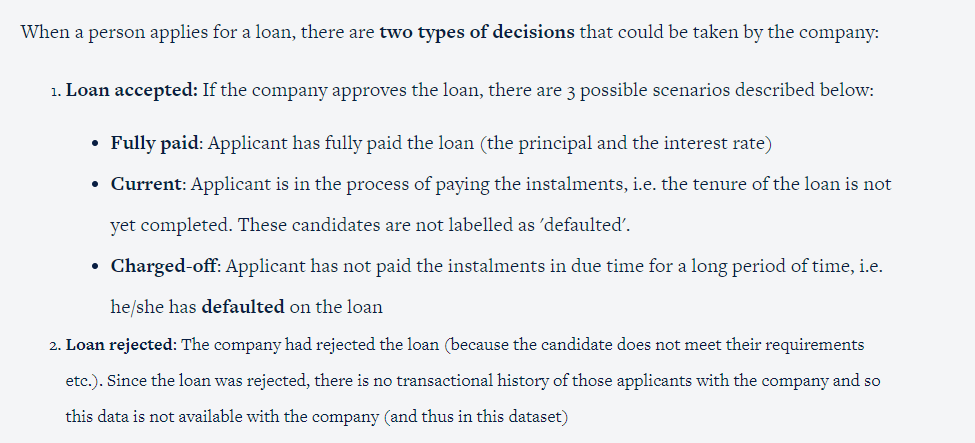

### Steps or Summary :
- Import Necessary Libraries
- Load the data and Data dictionary
- Data Understanding
- Missing Value Check
- Segmentation of Column
- Analysis:
    - Univariate Analysis (One Variable at a time)
    - Bivariate Analysis (Two Variable at a time)
    - Multivariate Analysis (More than two Variables at a time)

### Import Necessary Libraries


In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
sns.set(style='whitegrid')

### Load the Data

In [2]:
loan=pd.read_csv('loan.csv')
# To display maximum rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [6]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Observation -  Looking at the description, there are a lot of missing or null values, so we have to perform Data Cleaning steps

### Missing Values Check

In [9]:
loan_original=loan.copy()

##### Let's create a copy of the original DataFrame before starting the cleaning operation. If we need to refer the original data at some point of analysis , then the "loan_original" can be checked. We'll use "loan" throughout for our analysis

In [10]:
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

bc_open_to_buy                    100.00
acc_open_past_24mths              100.00
bc_util                           100.00
mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_rev_tl_op             100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_2

#### Let's remove the columns with 100% missing values first as they'll be of no use

In [11]:
loan = loan.drop(columns=loan_missingvalues[loan_missingvalues==100.00].index)

In [12]:
### check and validate the shape again
loan.shape

(39717, 57)

In [13]:
###check null or missing values again
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

#### There are four columns where we have a lot of null or missing values ( more than 30%) . So we should also remove them in order to get exact picture

In [14]:
loan_missingvalues[loan_missingvalues>30.00]

desc                      32.59
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64

In [15]:
loan = loan.drop(columns=loan_missingvalues[loan_missingvalues>30.00].index)

In [16]:
### check and validate the shape again
loan.shape

(39717, 53)

#### Let us have a look at the above columns to analyze further. Lets check the count of unique values present in each column.

In [17]:
loan.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [18]:
loan[['pymnt_plan','initial_list_status','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].head()

,pymnt_plan,initial_list_status,policy_code,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
1,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
2,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
3,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0
4,n,f,1,0.0,INDIVIDUAL,0,0.0,0,0.0


#### Since the above columns are having same data for all the rows , so these will not help us in analysis and hence we can remove these columns

In [19]:
loan = loan.drop( ['pymnt_plan','initial_list_status','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'] , axis=1 )

In [20]:
loan.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

In [21]:
### check percentage of null or missing values again
loan_missingvalues=round( 100 * loan.isnull().mean() , 2 )
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
last_pymnt_d            0.18
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
dtype: float64

In [22]:
### check count of null or missing values
loan_missingvalues=loan.isnull().sum() 
loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)


emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
title                     11
last_credit_pull_d         2
dtype: int64

In [23]:
missing_columns=loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)
data_dictionary[ data_dictionary['LoanStatNew'].isin(missing_columns.index) ]

,LoanStatNew,Description
19,emp_length,Employment length in years. Possible values ar...
20,emp_title,The job title supplied by the Borrower when ap...
36,last_credit_pull_d,The most recent month LC pulled credit for thi...
40,last_pymnt_d,Last month payment was received
86,pub_rec_bankruptcies,Number of public record bankruptcies
91,revol_util,"Revolving line utilization rate, or the amount..."
95,title,The loan title provided by the borrower


#### last_credit_pull_d, title, revol_util  and last_pymnt_d have minimal amount of missing values - 0.01% , 0.02% , 0.13% and 0.18% respectively. Upon checking the column description , we decided to remove nulls from here.
#### Also the columns emp_title and emp_length have 6.19% (2459 rows) and 2.71% ( 1075 rows ) missing values. These columns have information about the customer/borrower like their job title and their employment length in years. So we can remove this rows  as well where emp_title or  emp_length is missing .

In [24]:
loan=loan[ ( ~ loan.emp_length.isnull() ) & ( ~ loan.emp_title.isnull() ) &  ( ~ loan.title.isnull() ) & ( ~loan.revol_util.isnull() ) &  ( ~loan.last_pymnt_d.isnull() ) & ( ~loan.last_credit_pull_d.isnull() ) ]

In [25]:
#check value counts of null columns
loan_missingvalues=loan.isnull().sum()
missing_columns=loan_missingvalues[loan_missingvalues>0].sort_values(ascending=False)
for column in missing_columns.index:
    unique_percentage = ( loan[column].value_counts(normalize=True) * 100  ).head()
    print(f" Percentage of unique values in column '{column}':\n {unique_percentage} \n ")
    unique_count = ( loan[column].value_counts()  ).head()
    print(f" Count of unique values in column '{column}':\n {unique_count} \n ")

 Percentage of unique values in column 'pub_rec_bankruptcies':
 pub_rec_bankruptcies
0.0    95.877364
1.0     4.103423
2.0     0.019213
Name: proportion, dtype: float64 
 
 Count of unique values in column 'pub_rec_bankruptcies':
 pub_rec_bankruptcies
0.0    34931
1.0     1495
2.0        7
Name: count, dtype: int64 
 


#### Let's impute pub_rec_bankruptcies

In [26]:
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median())

In [27]:
### check count of null or missing values
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

### Segmentation of Columns

In [28]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
loan.shape

(37087, 44)

#### Identification of relevant columns and variables
- There are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". This columns doesn't contribute to the loan defaulting in any way due to irrelevant information. Hence can be ignored or removed.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. Hence also can be ignored or removed.
- "funded_amnt" may not be needed because we only need info as to how much is funded in actual ,and also  we have "funded_amnt_inv" , but still we want to remove "funded_amnt".
- There are also some columns which will probably be used after approving the loan. Since we are analyzing the user details and the driving factors of loan defaulting before approving loan , we can safely ignore or remove the columns / variables corresponding to that scenario. Below is the list of these columns 
##### List of post-approval features columns / variables 
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [30]:
loan.nunique()

id                         37087
member_id                  37087
loan_amnt                    873
funded_amnt                 1030
funded_amnt_inv             7800
term                           2
int_rate                     368
installment                14749
grade                          7
sub_grade                     35
emp_title                  28683
emp_length                    11
home_ownership                 5
annual_inc                  4986
verification_status            3
issue_d                       55
loan_status                    3
url                        37087
purpose                       14
title                      18340
zip_code                     818
addr_state                    50
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21010
revol_util                  1082
total_acc 

In [ ]:
### confusion needs to be checked - delinq_2yrs, 

In [31]:
# Categorical Column
cat_cols=['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status','purpose','inq_last_6mths','pub_rec', 'pub_rec_bankruptcies' , 'addr_state']
# Numerical Columns
num_cols=['loan_amnt', 'funded_amnt_inv','int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_pymnt' , 'total_pymnt_inv']
# Date Columns
date_cols=['issue_d','earliest_cr_line','last_credit_pull_d']
# Not relevant to the analysis
extra_cols=[ "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "delinq_2yrs","revol_bal","out_prncp","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","funded_amnt"]

In [32]:
loan_cleaned=loan.copy()

In [33]:
loan=loan.drop(columns=extra_cols)

In [34]:
loan.shape

(37087, 26)

#### Looking into the object variables to check if they are required to be converted to numeric

In [35]:
newdf = loan.select_dtypes(include=object)
newdf.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,Apr-99,9.40%
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,Feb-96,21%
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,OR,Jan-96,53.90%
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,AZ,Nov-04,28.30%
6,60 months,15.96%,C,C5,8 years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,Jul-05,85.60%


#### Convert int_rate, revol_util and term into numerical by making necessary impuatations

In [36]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float64')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float64')
loan['term'] = loan['term'].str.strip(' months').astype('int64')

In [37]:
#### Convert emp_length into numeric
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan = loan.replace({"emp_length": emp_length_dict })

#### Converting these datatypes to datetime -  issue_d , earliest_cr_line

In [38]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')

In [39]:
newdf = loan.select_dtypes(include=object)
newdf.head()

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state
1,C,C4,RENT,Source Verified,Charged Off,car,GA
3,C,C1,RENT,Source Verified,Fully Paid,other,CA
4,B,B5,RENT,Source Verified,Current,other,OR
5,A,A4,RENT,Source Verified,Fully Paid,wedding,AZ
6,C,C5,RENT,Not Verified,Fully Paid,debt_consolidation,NC


#### Let's split the date columns to month and year to get a proper year wise analysis or month wise analysis later if required

In [40]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [41]:
loan.issue_d_year.value_counts()

issue_d_year
2011    20156
2010    10795
2009     4424
2008     1485
2007      227
Name: count, dtype: int64

In [42]:
loan.earliest_cr_line.value_counts()

earliest_cr_line
1998-11-01    358
1999-10-01    351
1998-12-01    333
2000-10-01    324
2000-11-01    308
1997-12-01    301
1999-11-01    300
2000-09-01    288
1997-11-01    285
1998-10-01    285
1995-12-01    278
1999-12-01    277
2000-12-01    271
2000-01-01    269
2000-07-01    264
1996-11-01    258
1996-12-01    258
2001-09-01    256
2002-10-01    255
2000-08-01    255
2001-10-01    254
2000-05-01    245
2000-04-01    243
1999-09-01    242
1998-08-01    239
1999-01-01    235
2003-10-01    235
1999-08-01    234
2001-01-01    233
1997-10-01    231
1994-12-01    229
2002-09-01    227
1998-09-01    224
1996-01-01    224
2004-10-01    222
1997-01-01    221
2000-02-01    214
1996-10-01    213
2003-11-01    212
1995-11-01    211
2000-06-01    209
1994-01-01    208
2001-12-01    208
1999-02-01    207
1999-07-01    205
2000-03-01    202
2003-09-01    201
1997-08-01    200
1999-05-01    198
1993-12-01    197
2001-08-01    195
2004-09-01    195
1994-11-01    193
1999-03-01    193
2001-05-01 

#### We can see that for earliest_cr_line_year, there are years which are even greater than 2011 which is absurd since this column represents the earliest credit line for the customer.  Clearly, there is a year conversion issue resulting in 1964 to become 2064 and so on. Let's convert them back.

In [43]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

### Data Cleaning Done, Will start analyzing the data now.
### Since we need to compare between the people who fully paid and the ones who defaulted, we will filter the data accordingly

In [44]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(36021, 30)

## Univariate Analysis

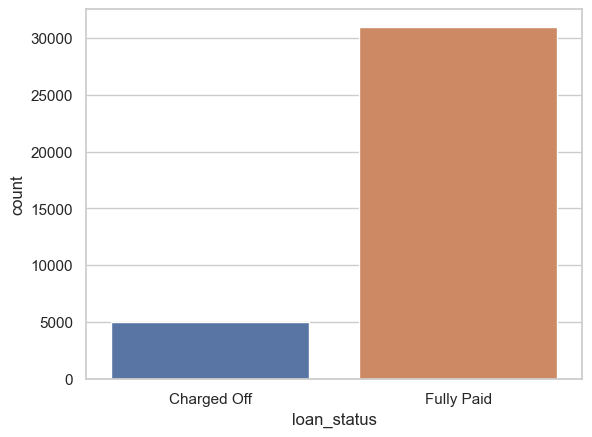

In [45]:
sns.countplot(x=loan["loan_status"],palette='deep')
plt.show()

In [46]:
round( 100* loan["loan_status"].value_counts(normalize=True) )

loan_status
Fully Paid     86.0
Charged Off    14.0
Name: proportion, dtype: float64

#### Observations - 
<b> We can infer that - </b>
1. Most of the loans are Fully paid
2. Around 14% loans are Charged Off

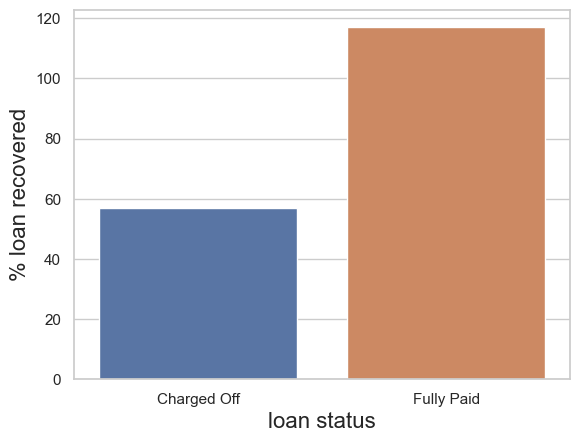

In [47]:
loan_status_pivot=pd.pivot_table(data=loan[["loan_status","loan_amnt","total_pymnt"]] , values=["loan_amnt","total_pymnt"] , index="loan_status" ,aggfunc=np.sum )
loan_status_pivot["% loan recovered"]=round( 100 * loan_status_pivot['total_pymnt'] / loan_status_pivot['loan_amnt'] )
sns.barplot(loan_status_pivot["% loan recovered"] , palette='deep')
plt.xlabel('loan status', fontsize=16)
plt.ylabel('% loan recovered', fontsize=16)
plt.show()

#### Observations -
<b> Variable - loan_amnt </b> - We can see that when a loan is Charged_Off, the bank can recover close to 57% of the amount

### Numerical Columns

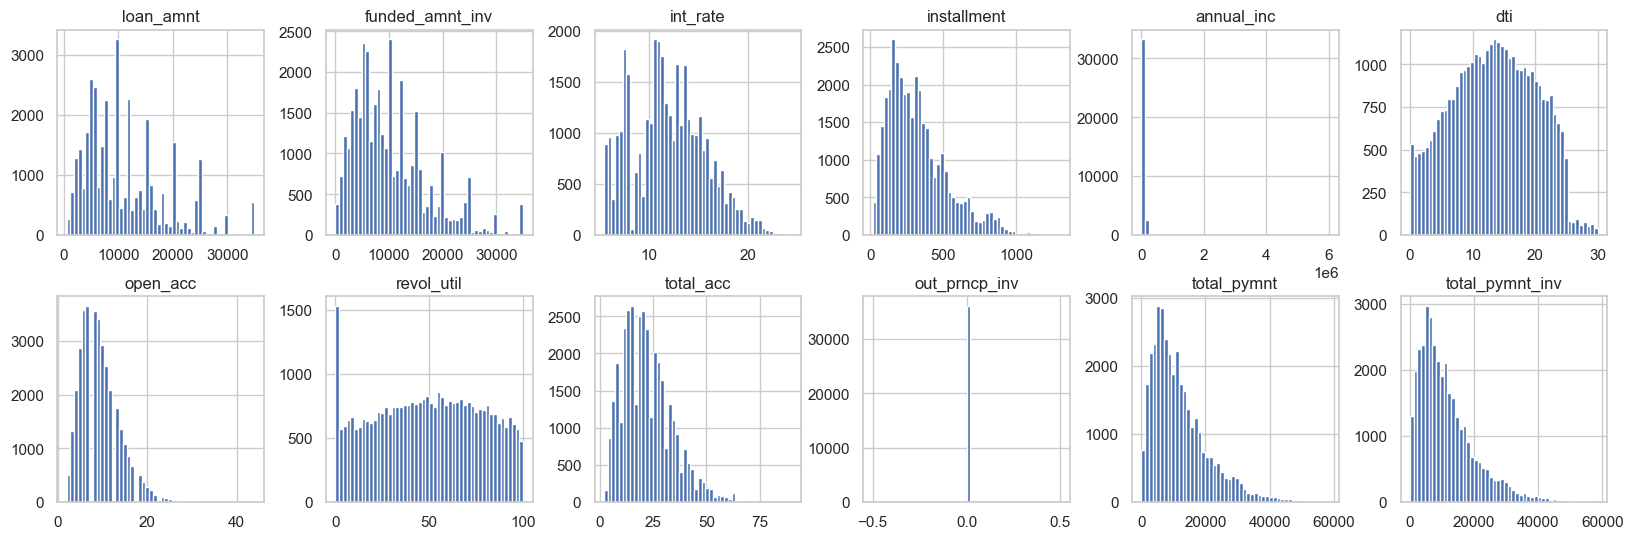

In [48]:
# plotting numerical data in a single plot
loan[num_cols].hist(bins=50,figsize=(20,20), color='#4C72B0', layout=(6,6));

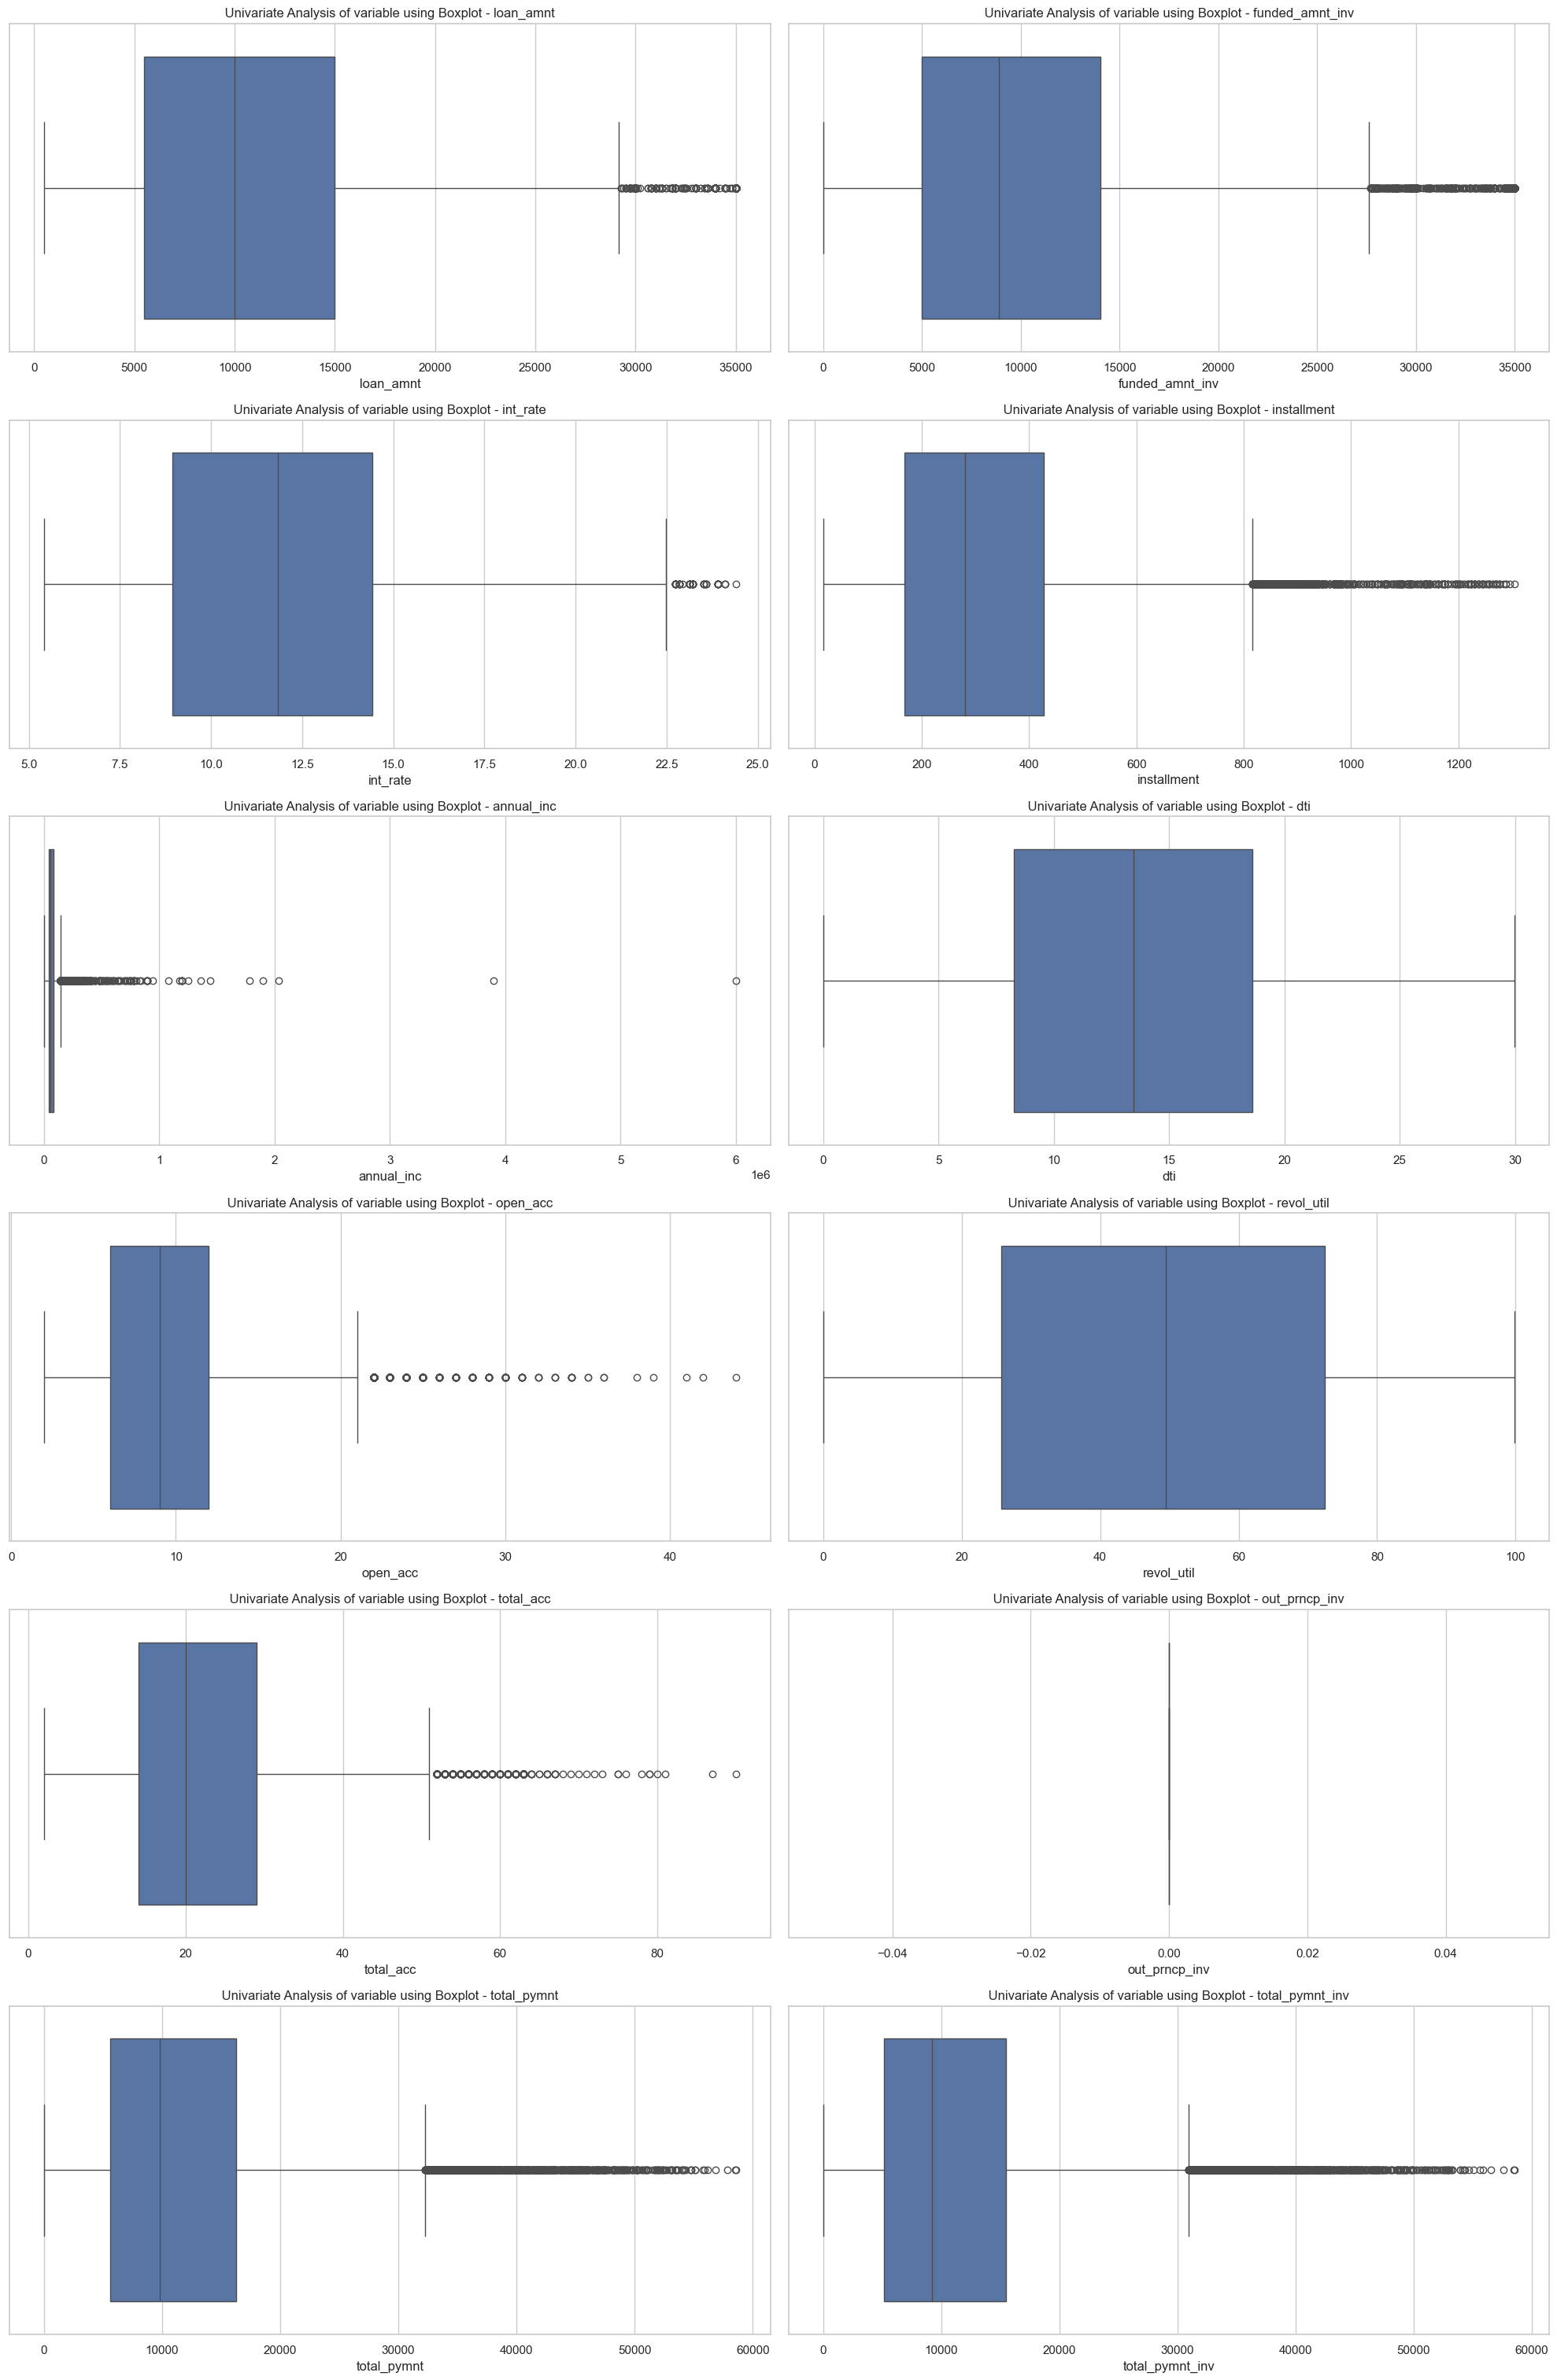

In [74]:
plt.figure(figsize=(20,40))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot( x=loan[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Boxplot - {col} ' )
plt.tight_layout()
plt.show()

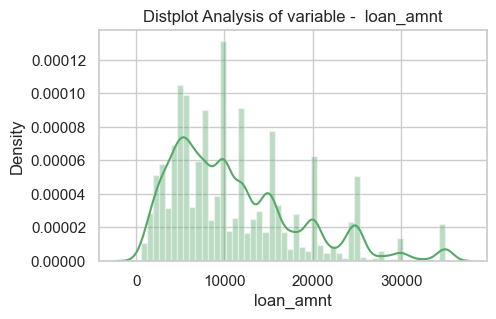

In [75]:
### Loan amount
plt.figure(figsize=[5,3])
sns.distplot(loan['loan_amnt'] , color='#55A868')
plt.title(f'Distplot Analysis of variable -  loan_amnt')
plt.show()

#### Observations - 
1. <b> Variable - loan_amnt </b> - Loan amounts are left skewed and generally in the range of 5000 - 10000 with spikes at every 5000 interval
2. <b> Variable - annual_inc </b> - Very Few people have very high annual income

### Categorical Columns

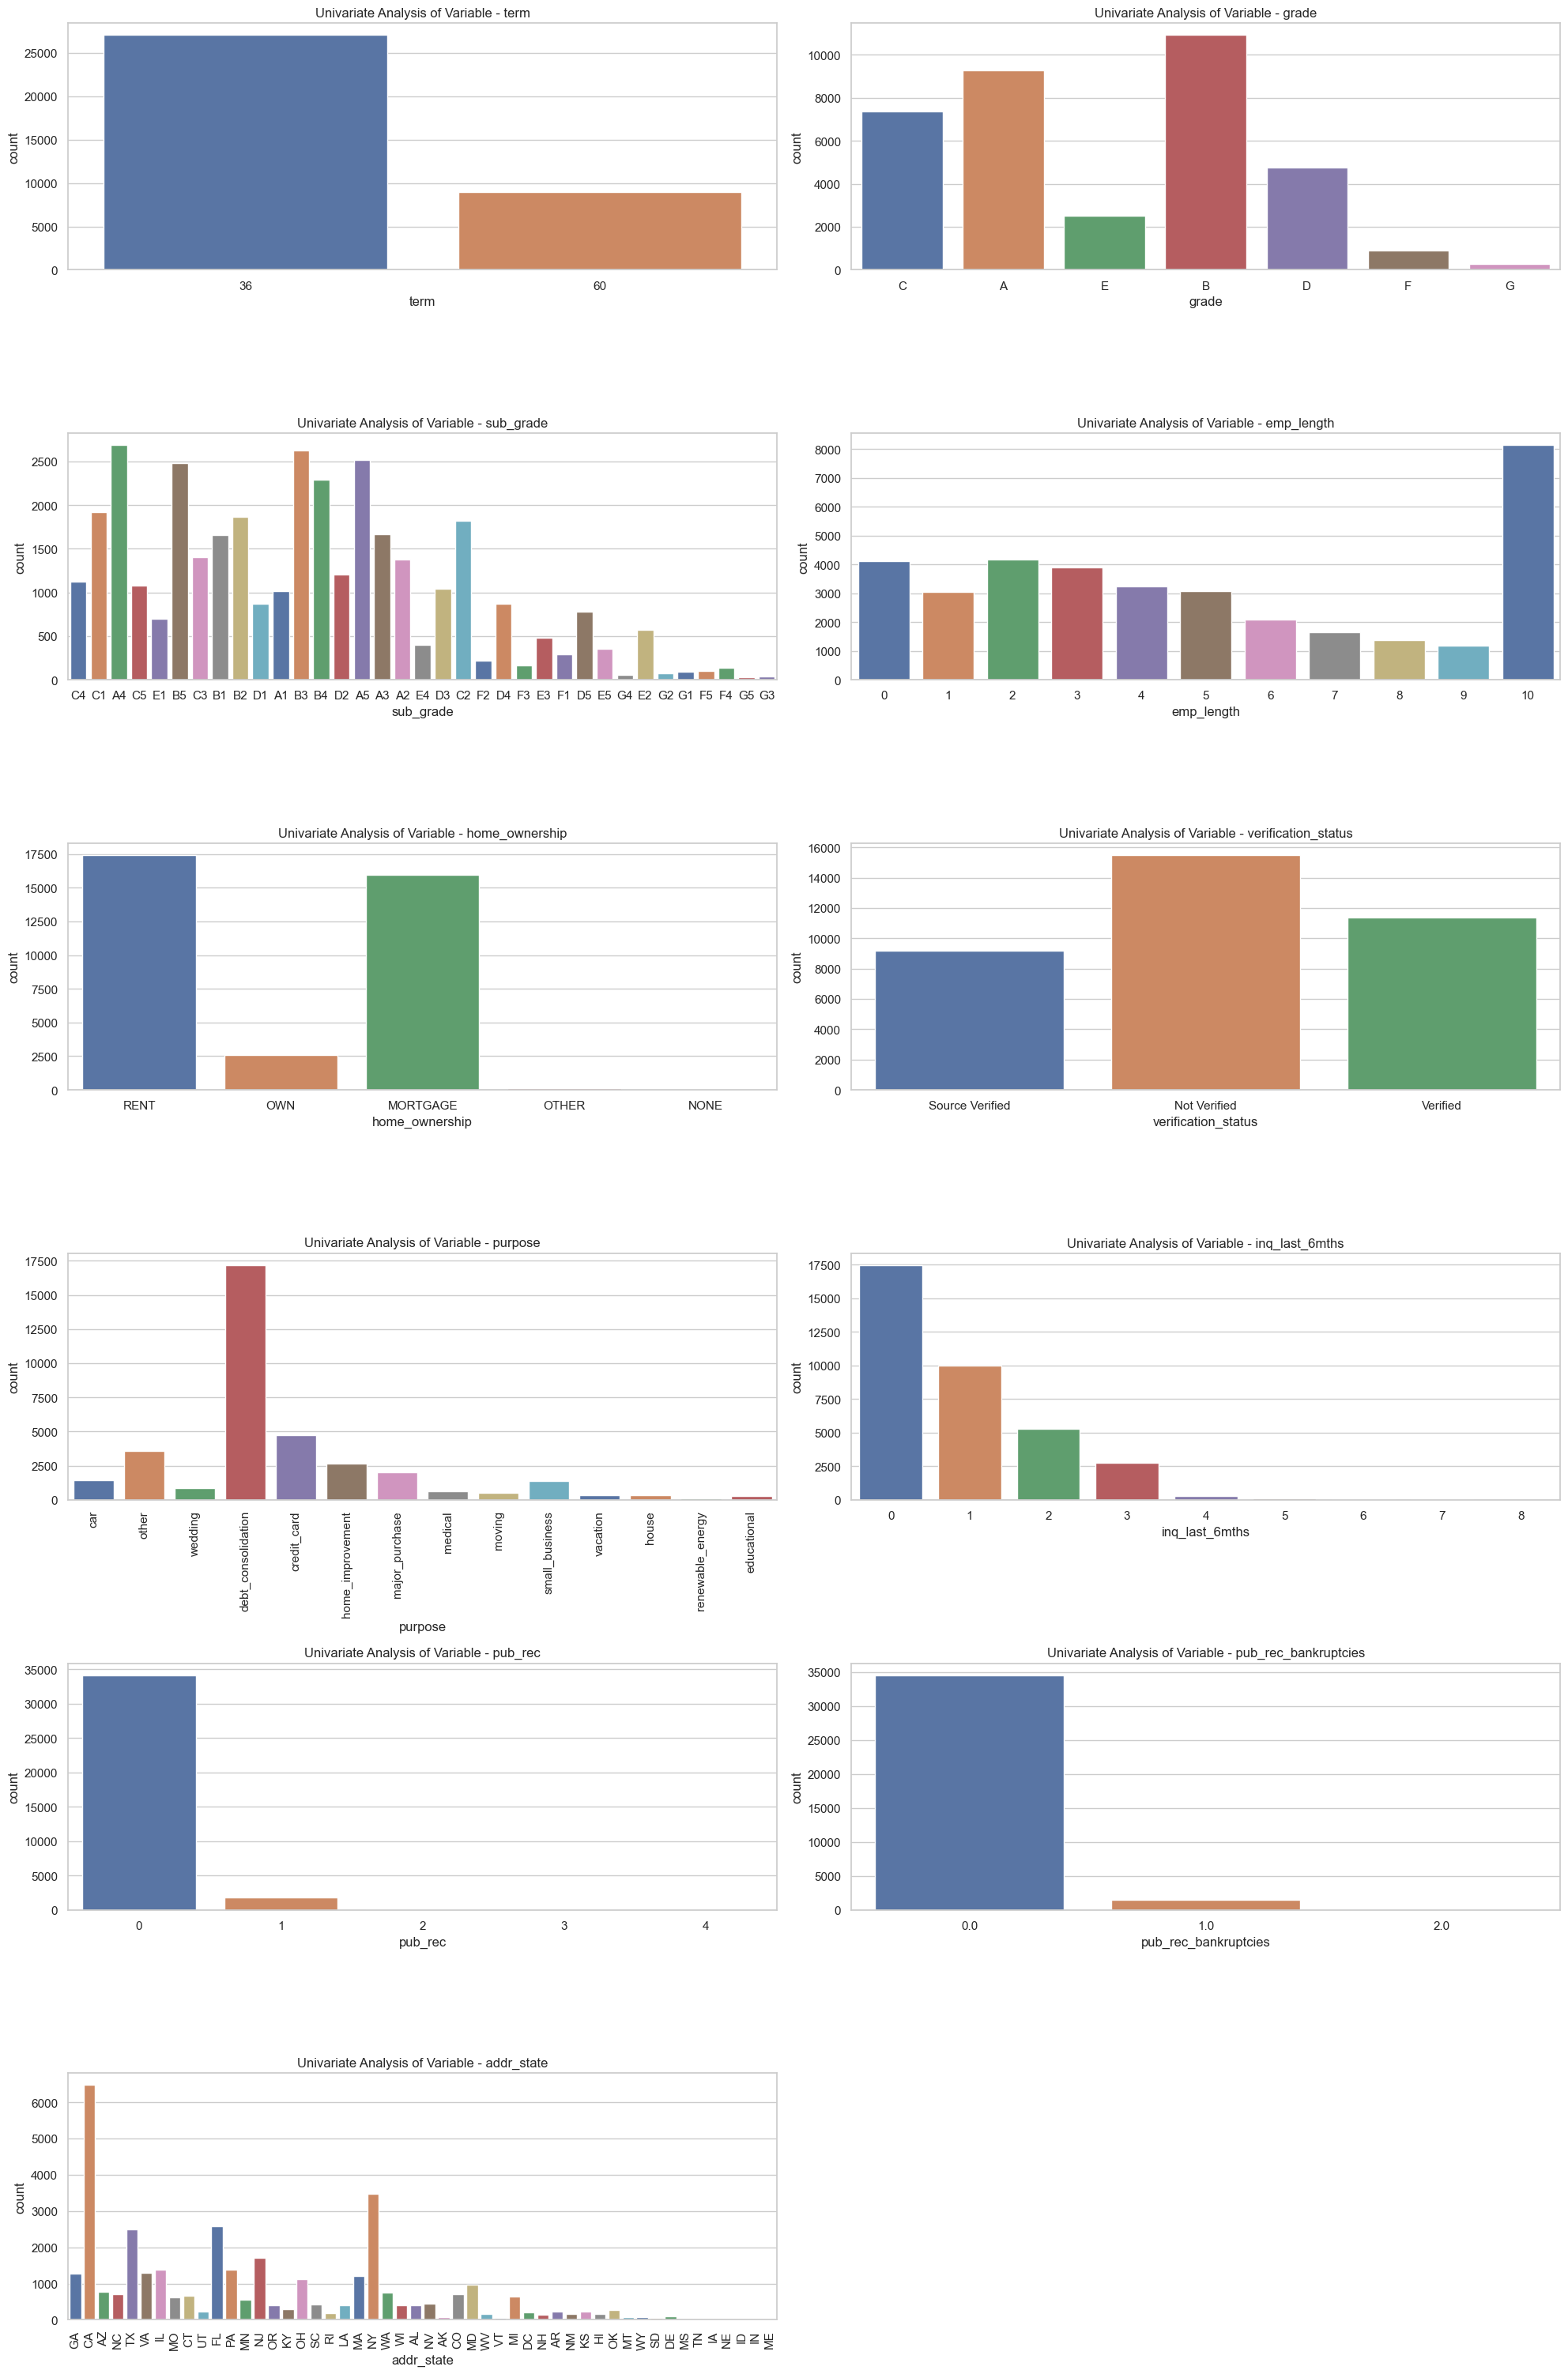

In [76]:
plt.figure(figsize=(20,40))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.countplot( x=loan[col] , palette='deep' )
    plt.title( f'Univariate Analysis of Variable - {col}' )
    if col in ('purpose','addr_state') :
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - grade </b> - We can see that most of the loans are high graded loans and thus not too prone to suffer default.
2. <b> Variable - emp_length </b> - From the above plot it can be seen that most employees for whom loans have been lent out are of 10+ years of experience
3. <b> Variable - purpose </b> - The majority of the loans issued are for debt_consolidation
4. <b> Variable - term </b> - More loans issued are for 36 months compared to other terms.

## Bivariate Analysis

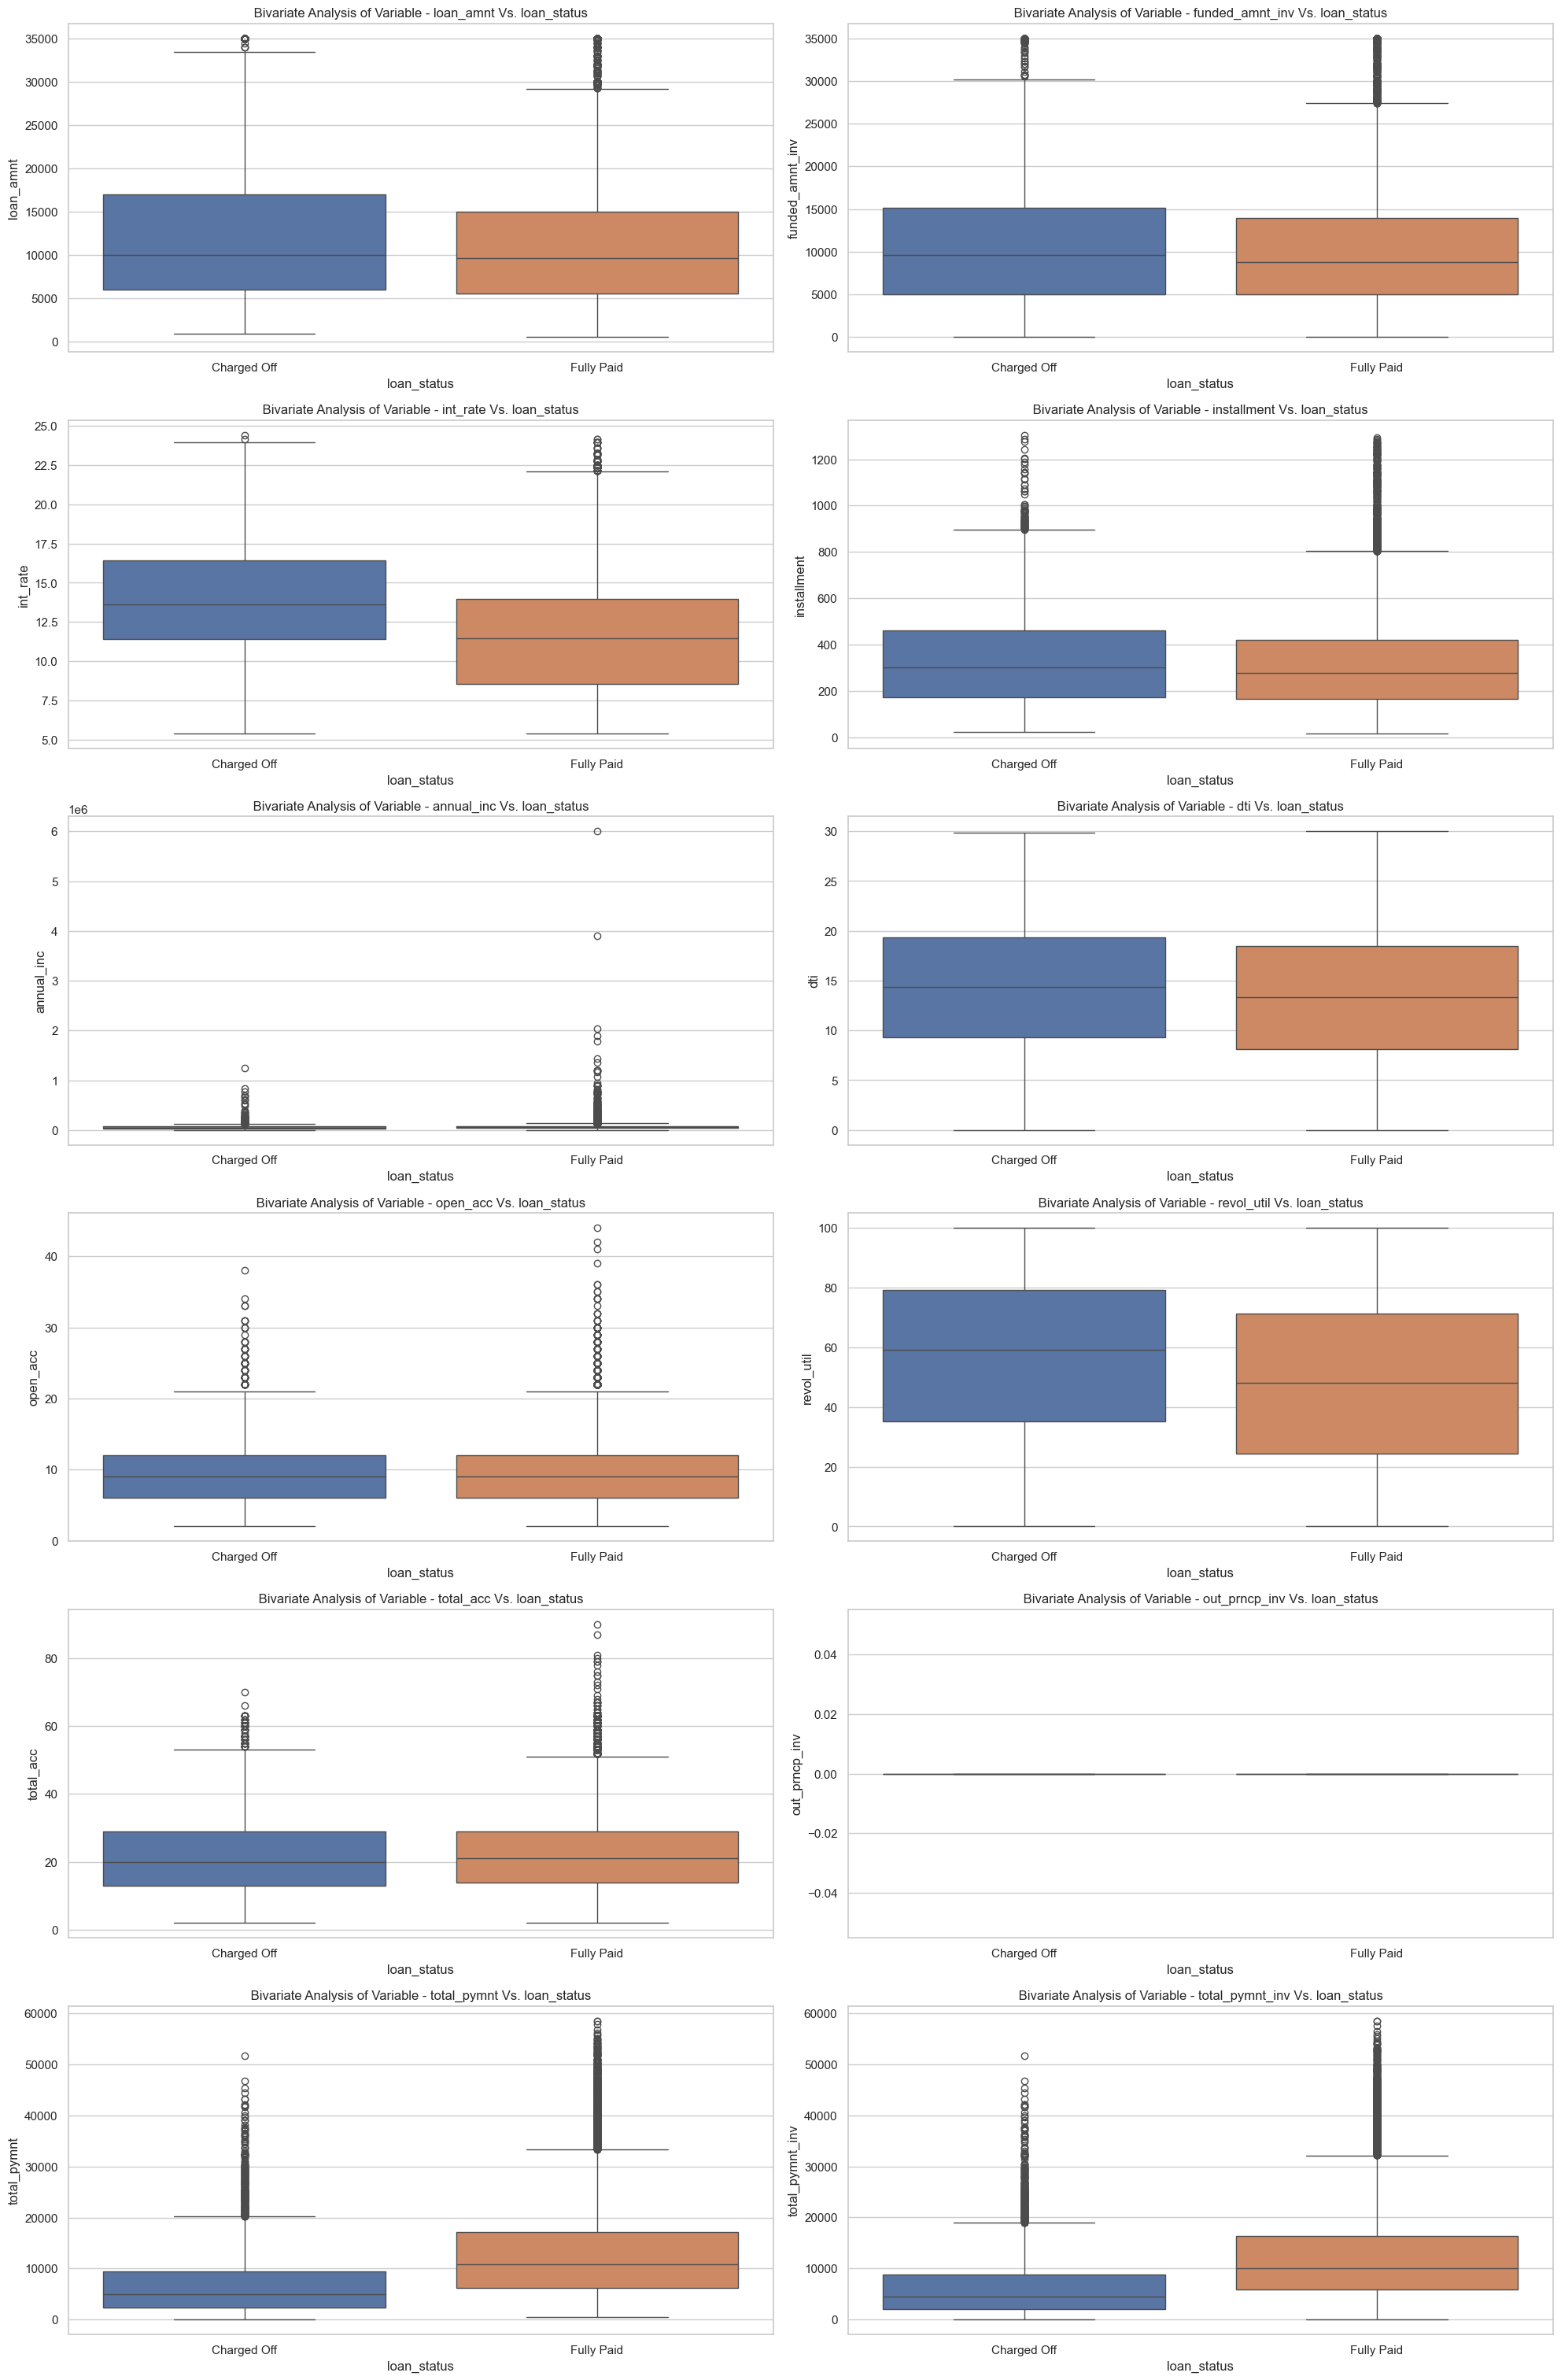

In [77]:
# Numerical Vs Categorical
plt.figure(figsize=(20,40))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot(x=loan["loan_status"] , y=loan[col] , palette='deep')
    plt.title( f' Bivariate Analysis of Variable - {col} Vs. loan_status ' )
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - loan_amnt </b> - Almost identical 25% and mean for both loan_status (Charged Off and Fully Paid)
2. 

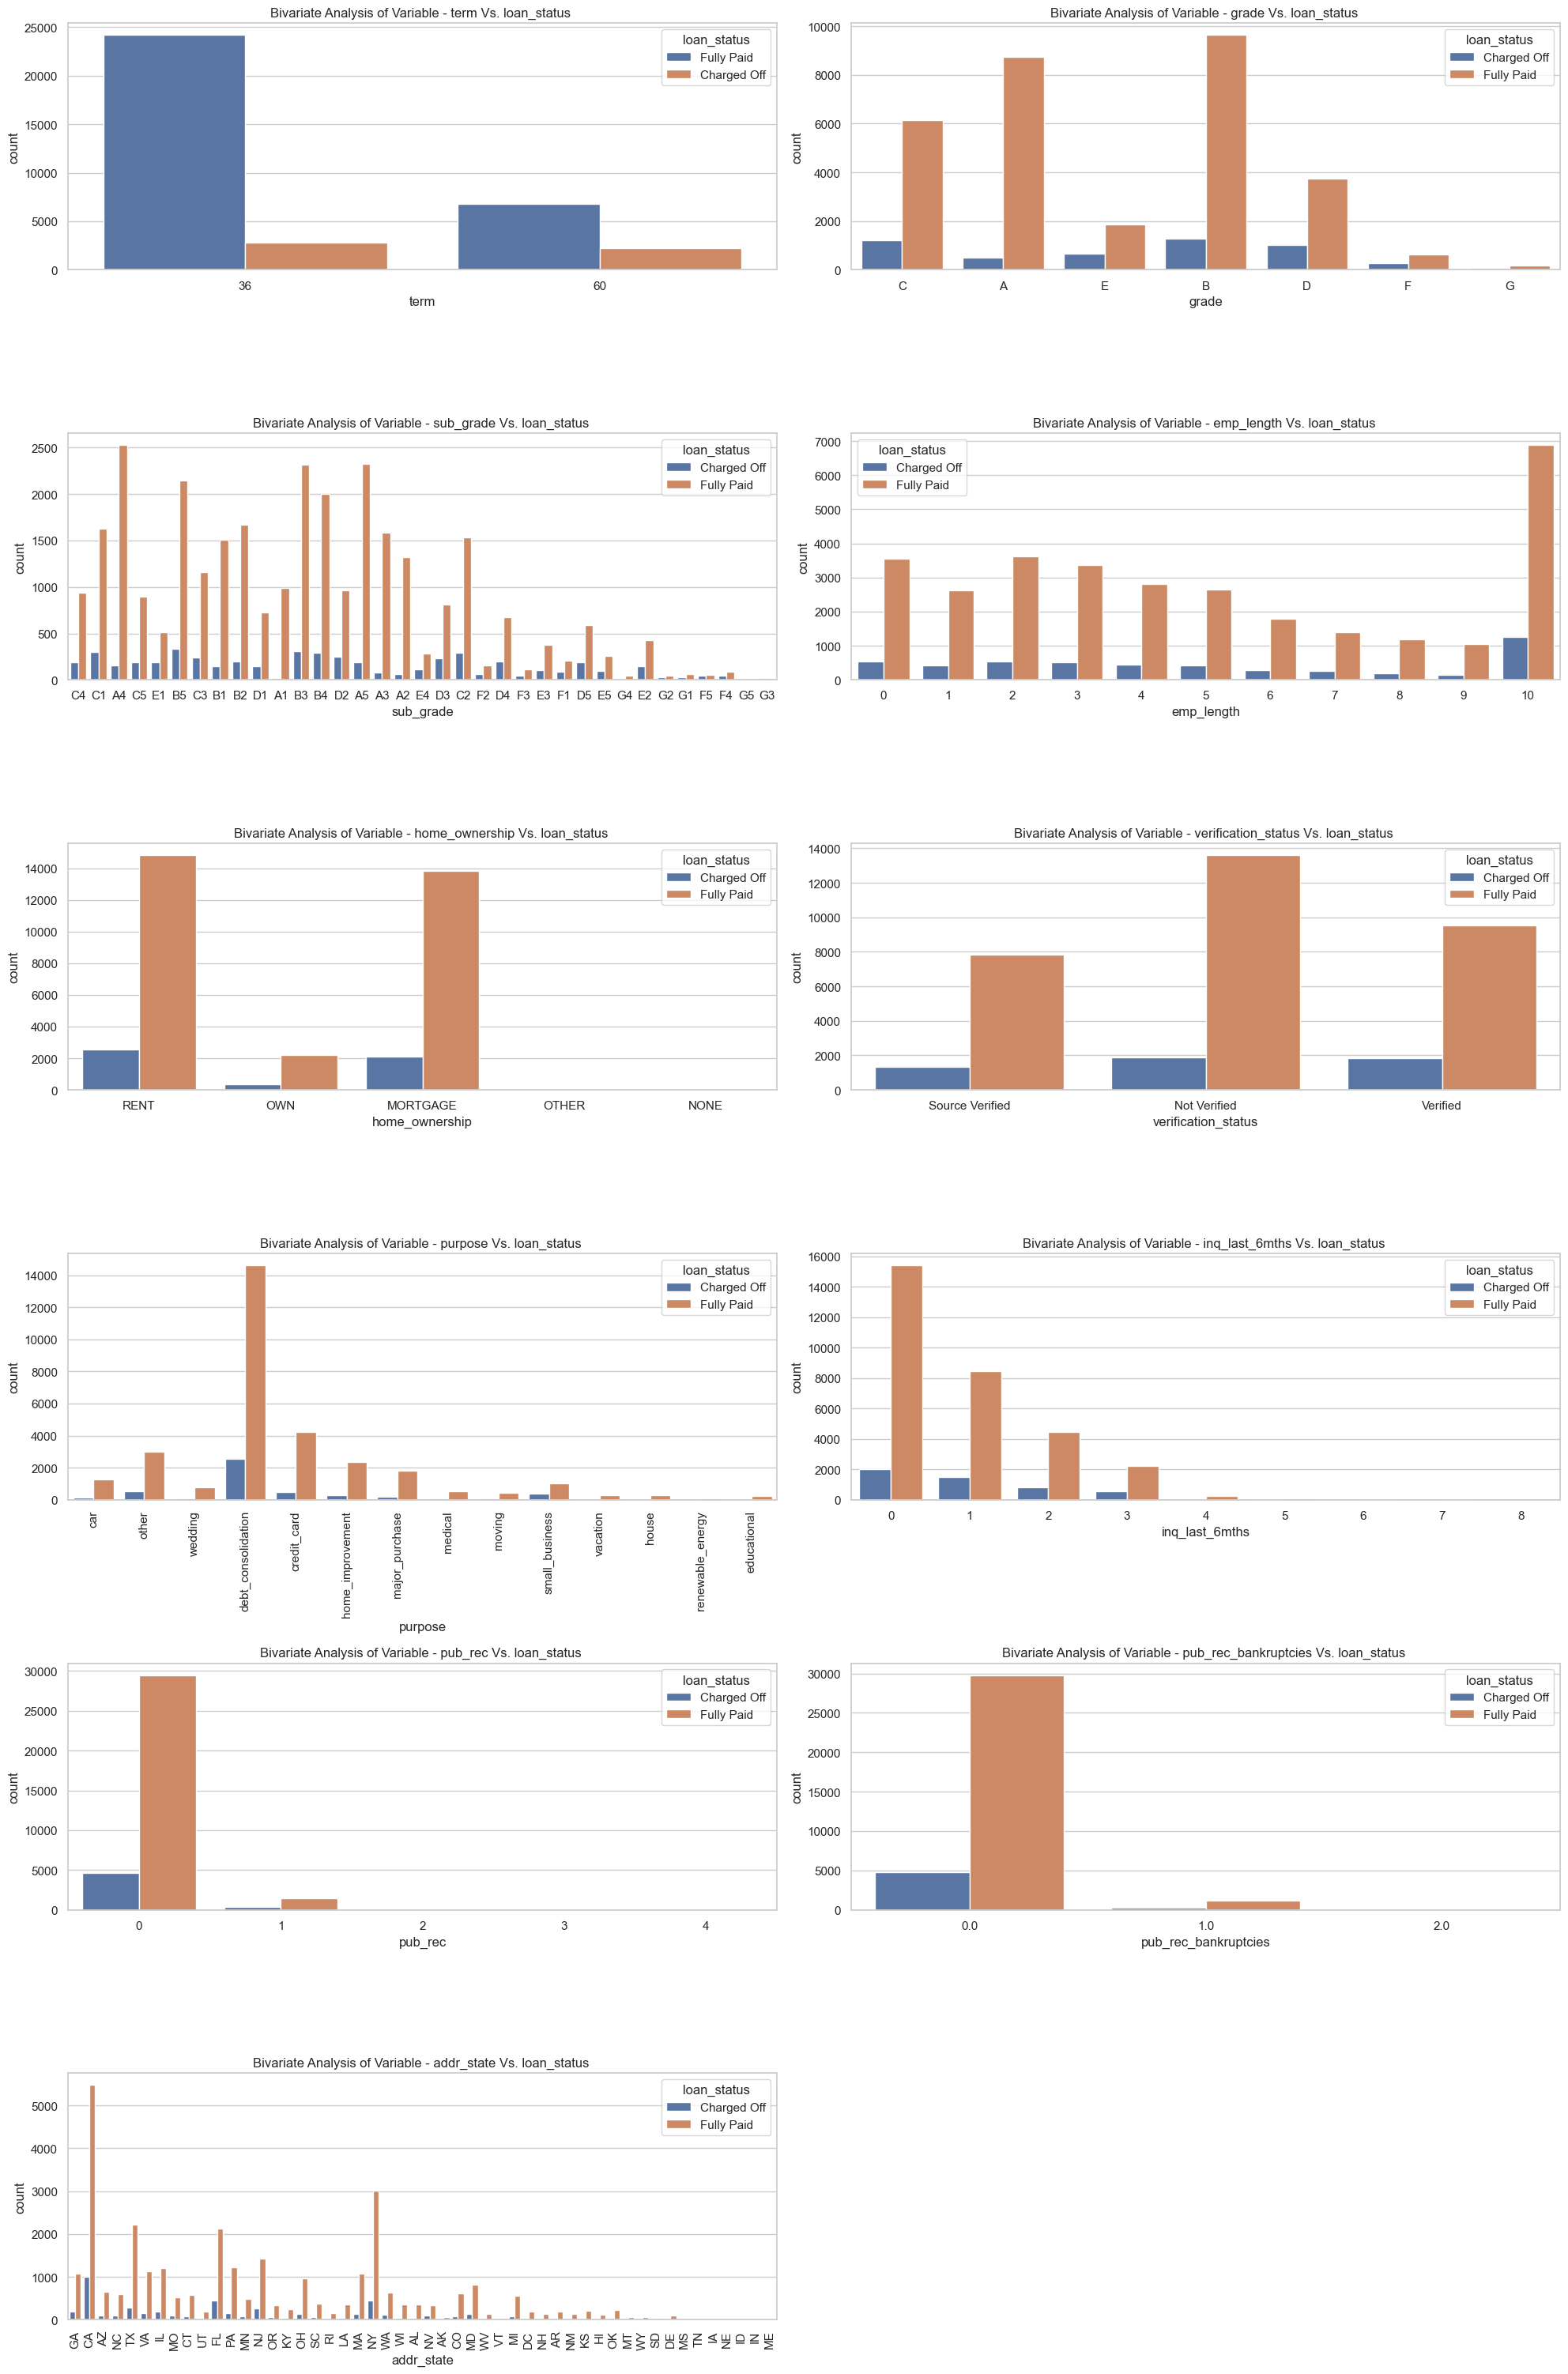

In [79]:
# Categorical Vs Categorical
plt.figure(figsize=(20,40))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.countplot(data=loan[cat_cols] , hue=loan["loan_status"] , x=loan[col] , palette='deep' )
    plt.title( f'Bivariate Analysis of Variable - {col} Vs. loan_status ' )
    if col in ('purpose','addr_state') :
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observations - 
1. <b> Variable - emp_length </b> - From the above plot, although it can be seen that people with 10+ experience pay off their loans much more, but they default on the loans as well to quite an extent. The loan defaults steadily increase from 1-3 years and then falls and has a big spike on 10+.
2. <b> Variable - term </b> - most loans issued for 36 months are fully paid

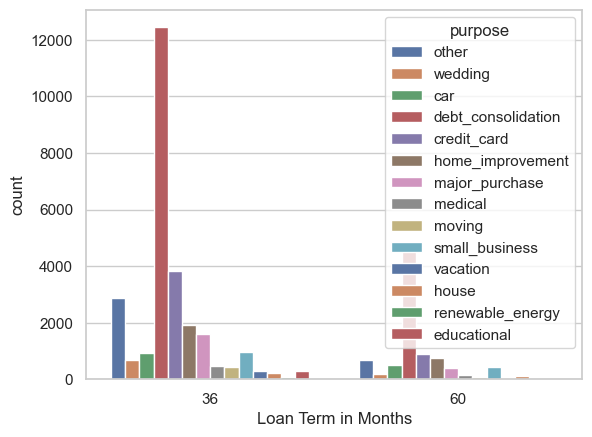

In [80]:
## Loan term and purpose
sns.countplot( x="term", hue='purpose', data=loan , palette='deep')
plt.xlabel('Loan Term in Months')
plt.show()

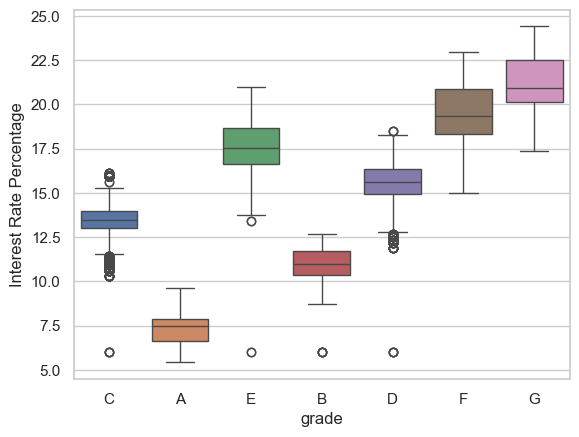

In [81]:
## Check if Interest Rate is dependent on grade

sns.boxplot(y='int_rate', x='grade', data=loan , palette='deep')
plt.ylabel('Interest Rate Percentage')
plt.show()

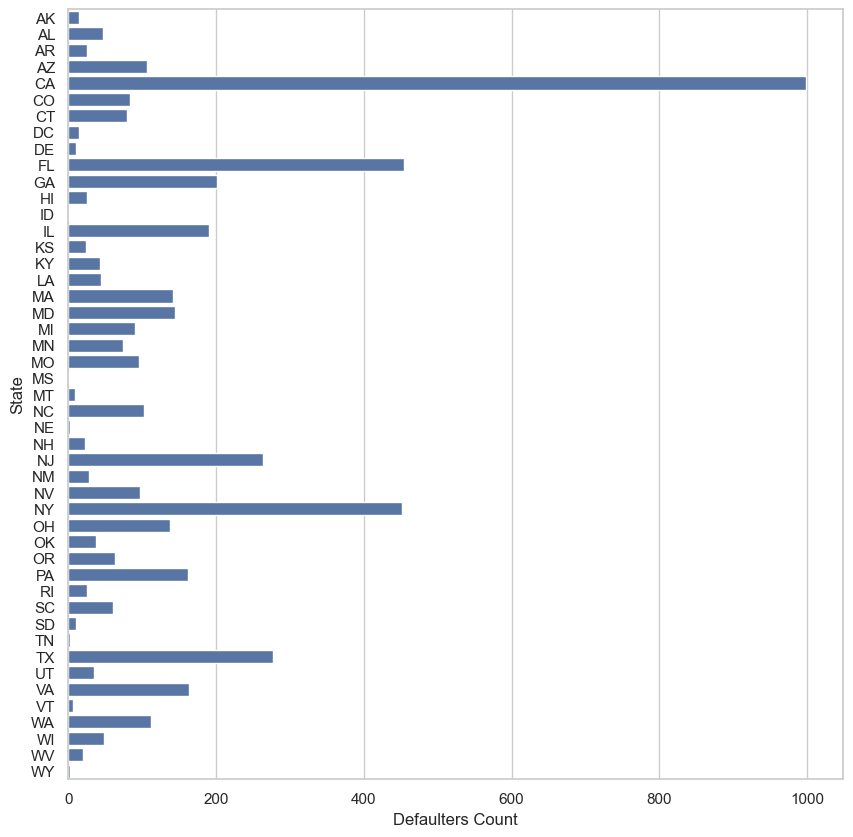

In [82]:
##Defaulters Count from State
state = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=state , color='#4C72B0')
plt.xlabel('Defaulters Count')
plt.ylabel('State')
plt.show()

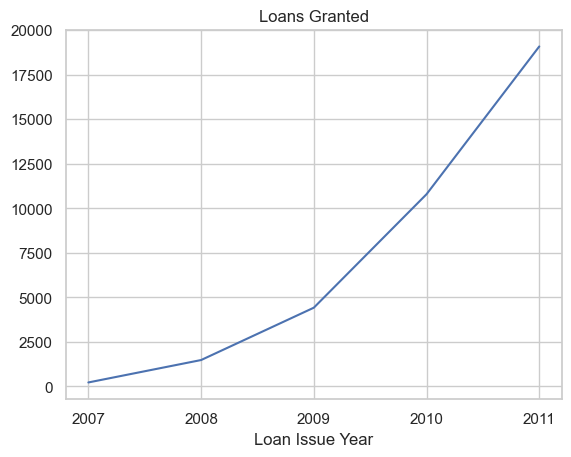

In [83]:
## Plot of issue year with loan status
issue_year = loan.groupby('issue_d_year')['loan_status'].count()
issue_year.plot.line(x_compat=True , color='#4C72B0')
plt.xticks(np.arange(min(issue_year.index), max(issue_year.index)+1, 1.0))
plt.title('Loans Granted')
plt.xlabel('Loan Issue Year')
plt.show()

In [84]:
loan_less = loan[loan['loan_amnt'] <= 10000].groupby(['loan_status'])['loan_amnt'].count().reset_index()

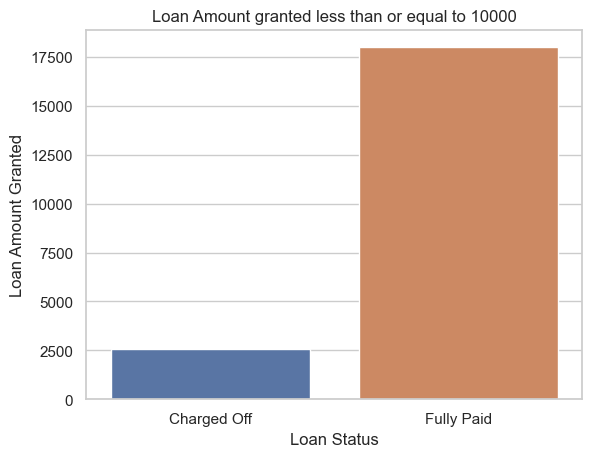

In [85]:
sns.barplot(x='loan_status', y='loan_amnt', data=loan_less , palette='deep')
plt.title('Loan Amount granted less than or equal to 10000')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [86]:
loan_greater = loan[loan['loan_amnt'] > 10000].groupby(['loan_status'])['loan_amnt'].count().reset_index()

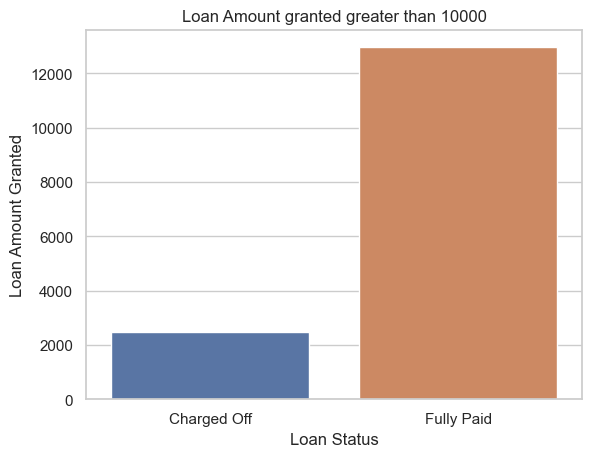

In [87]:
sns.barplot(x='loan_status', y='loan_amnt', data=loan_greater , palette='deep')
plt.title('Loan Amount granted greater than 10000')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

## Multivariate Analysis

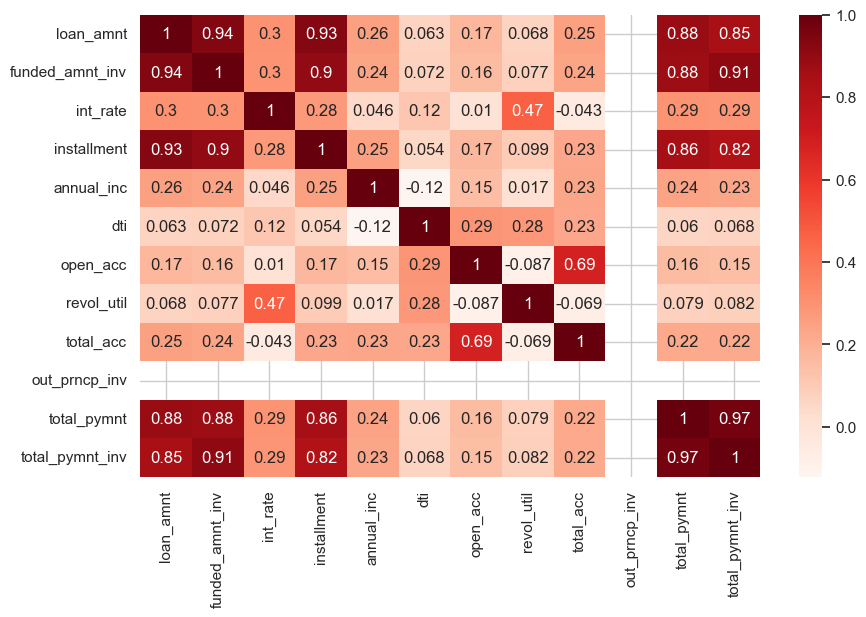

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(loan[num_cols].corr(),annot=True,cmap="Reds")
plt.show()